<a href="https://colab.research.google.com/github/Um333r/Time_series/blob/master/Reliance_EDA_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sms
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
shares=pd.read_csv("/content/RELIANCE2.csv")
shares

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087
1,2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697
2,2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041
3,2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382
4,2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822
...,...,...,...,...,...,...,...
1164,2023-09-14,2460.000000,2465.800049,2445.000000,2453.300049,2453.300049,4604818
1165,2023-09-15,2468.000000,2468.000000,2449.500000,2457.850098,2457.850098,12734296
1166,2023-09-18,2440.050049,2451.000000,2432.050049,2436.449951,2436.449951,3758150
1167,2023-09-20,2423.050049,2427.600098,2355.000000,2382.149902,2382.149902,28540942


In [3]:
shares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1169 non-null   object 
 1   Open       1169 non-null   float64
 2   High       1169 non-null   float64
 3   Low        1169 non-null   float64
 4   Close      1169 non-null   float64
 5   Adj Close  1169 non-null   float64
 6   Volume     1169 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 64.1+ KB


In [4]:
shares.duplicated().sum()

0

In [5]:
shares.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
shares1=shares.dropna()
shares1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087
1,2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697
2,2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041
3,2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382
4,2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822
...,...,...,...,...,...,...,...
1164,2023-09-14,2460.000000,2465.800049,2445.000000,2453.300049,2453.300049,4604818
1165,2023-09-15,2468.000000,2468.000000,2449.500000,2457.850098,2457.850098,12734296
1166,2023-09-18,2440.050049,2451.000000,2432.050049,2436.449951,2436.449951,3758150
1167,2023-09-20,2423.050049,2427.600098,2355.000000,2382.149902,2382.149902,28540942


In [7]:
shares1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
shares1['Date']=pd.to_datetime(shares1['Date'])
shares1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087
1,2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697
2,2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041
3,2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382
4,2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822
...,...,...,...,...,...,...,...
1164,2023-09-14,2460.000000,2465.800049,2445.000000,2453.300049,2453.300049,4604818
1165,2023-09-15,2468.000000,2468.000000,2449.500000,2457.850098,2457.850098,12734296
1166,2023-09-18,2440.050049,2451.000000,2432.050049,2436.449951,2436.449951,3758150
1167,2023-09-20,2423.050049,2427.600098,2355.000000,2382.149902,2382.149902,28540942


In [9]:
shares1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1169 non-null   datetime64[ns]
 1   Open       1169 non-null   float64       
 2   High       1169 non-null   float64       
 3   Low        1169 non-null   float64       
 4   Close      1169 non-null   float64       
 5   Adj Close  1169 non-null   float64       
 6   Volume     1169 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 64.1 KB


In [10]:
shares1=shares1.set_index("Date")
shares1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822
...,...,...,...,...,...,...
2023-09-14,2460.000000,2465.800049,2445.000000,2453.300049,2453.300049,4604818
2023-09-15,2468.000000,2468.000000,2449.500000,2457.850098,2457.850098,12734296
2023-09-18,2440.050049,2451.000000,2432.050049,2436.449951,2436.449951,3758150


In [11]:
shares1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822


In [12]:
shares1.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-14,2460.000000,2465.800049,2445.000000,2453.300049,2453.300049,4604818
2023-09-15,2468.000000,2468.000000,2449.500000,2457.850098,2457.850098,12734296
2023-09-18,2440.050049,2451.000000,2432.050049,2436.449951,2436.449951,3758150
2023-09-20,2423.050049,2427.600098,2355.000000,2382.149902,2382.149902,28540942
2023-09-21,2374.949951,2390.100098,2360.000000,2364.800049,2364.800049,6113091


# Data Visualization

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

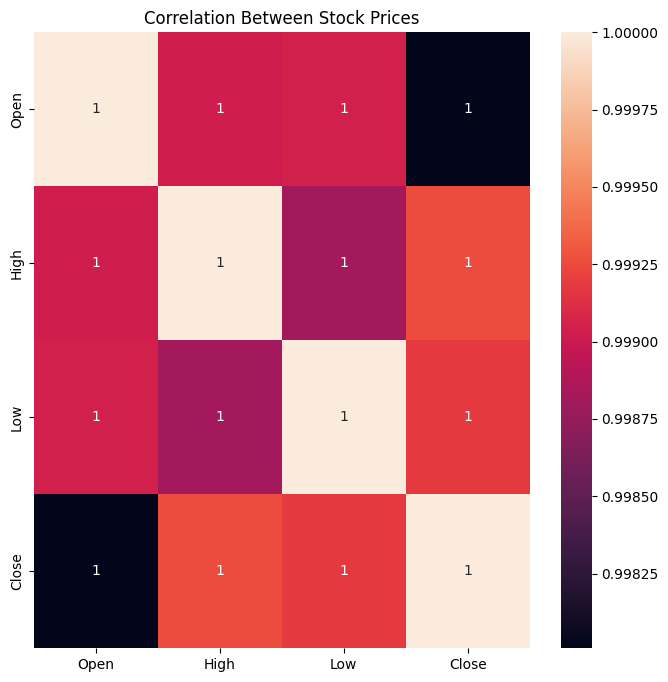

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(shares1[['Open','High','Low','Close']].corr(),annot=True)
plt.title("Correlation Between Stock Prices")
plt.show()

<Axes: xlabel='Date'>

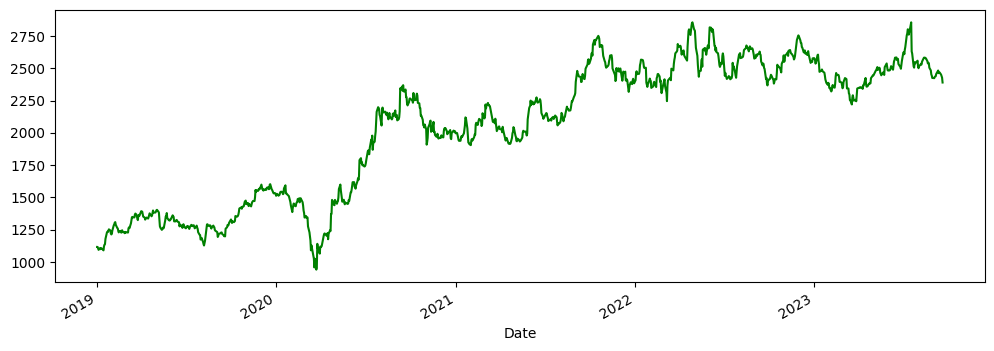

In [15]:
shares1['High'].plot(figsize=(12,4),c='green')

<Axes: xlabel='Date'>

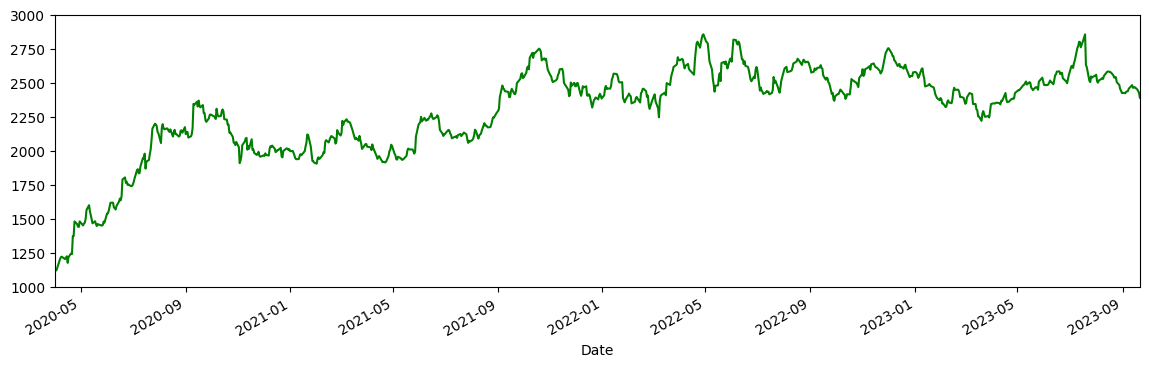

In [16]:
shares1['High'].plot(xlim=['2020-04-01','2023-09-21'],ylim=[1000,3000],figsize=(14,4),c='green')

In [17]:
index=shares1.loc['2020-04-01':'2023-09-21'].index
shares1_open=shares1.loc['2020-04-01':'2023-09-21']['Open']

In [18]:
shares1_open

Date
2020-04-01    1111.712036
2020-04-03    1123.797485
2020-04-07    1091.751343
2020-04-08    1168.919800
2020-04-09    1202.600586
                 ...     
2023-09-14    2460.000000
2023-09-15    2468.000000
2023-09-18    2440.050049
2023-09-20    2423.050049
2023-09-21    2374.949951
Name: Open, Length: 863, dtype: float64

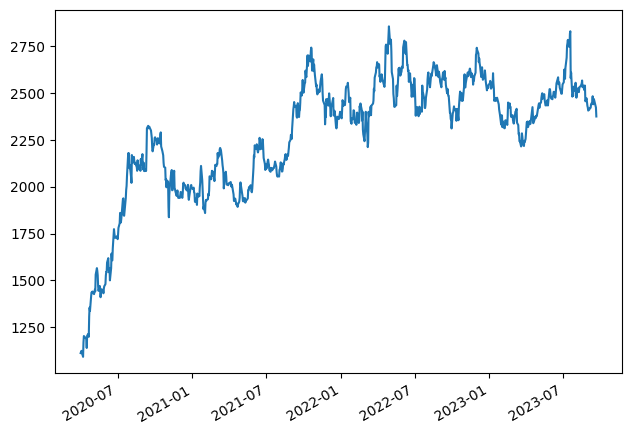

In [19]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,shares1_open)

Resample is used in time series for frequency conversion and resampling of time series.

In [20]:
###Frequency at End of the Year
shares1.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,1084.718018,1090.166260,1070.948486,1082.489136,1062.100586,1391348
2020-12-31,907.596863,941.079529,867.427673,875.748779,864.012573,2411900
2021-12-31,1859.400024,1905.000000,1830.000000,1841.949951,1824.088867,787160
2022-12-31,2211.500000,2246.000000,2180.000000,2235.500000,2220.944336,1555270
2023-12-31,2215.000000,2220.000000,2180.000000,2201.250000,2193.501465,0


In [21]:
shares1.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,1599.835205,1602.361206,1581.112671,1594.832642,1573.459717,48377710
2020-12-31,2325.000000,2369.350098,2310.550049,2324.550049,2302.009033,65848350
2021-12-31,2742.750000,2751.350098,2708.000000,2731.850098,2714.062744,42209687
2022-12-31,2856.149902,2856.149902,2786.100098,2819.850098,2801.489746,37841671
2023-12-31,2830.000000,2856.000000,2797.000000,2841.850098,2831.846680,28540942


<Axes: xlabel='Date'>

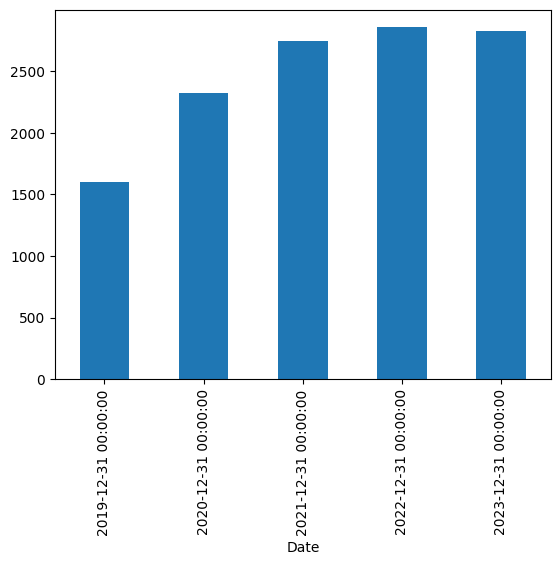

In [22]:
shares1['Open'].resample(rule='A').max().plot(kind='bar')

<Axes: xlabel='Date'>

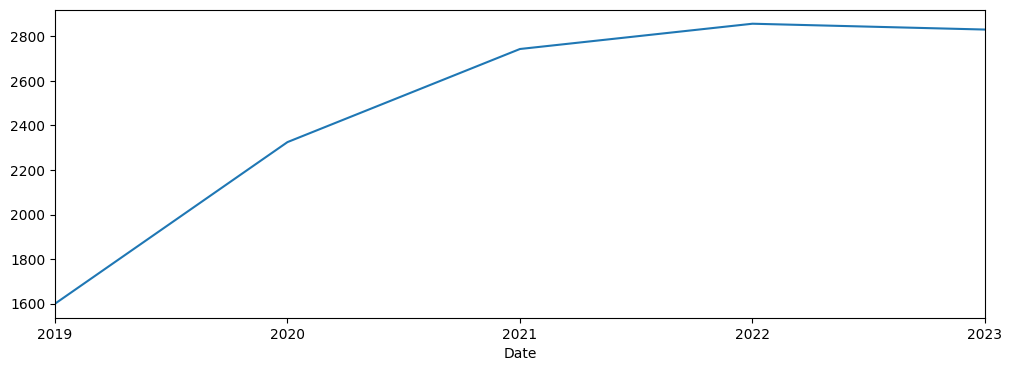

In [23]:
shares1.resample(rule='A').max()['Open'].plot(figsize=(12,4))

In [24]:
###Quarterly Start Frequency
shares1.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1365.011108,1374.966675,1351.192017,1363.624146,1337.940552,25927601
2019-04-01,1394.729370,1404.189697,1389.479126,1395.620850,1369.334473,19692278
2019-07-01,1297.699097,1323.207275,1293.290894,1319.740234,1302.053833,48377710
2019-10-01,1599.835205,1602.361206,1581.112671,1594.832642,1573.459717,20092835
2020-01-01,1593.891479,1593.891479,1538.615479,1566.154419,1545.165771,40698294
2020-04-01,1773.400024,1804.199951,1735.000000,1759.400024,1735.821655,65848350
2020-07-01,2325.000000,2369.350098,2310.550049,2324.550049,2302.009033,64750460
2020-10-01,2290.000000,2309.000000,2268.500000,2287.500000,2265.318359,45857806
2021-01-01,2207.000000,2231.899902,2170.250000,2202.100098,2180.746582,25016570


<Axes: xlabel='Date'>

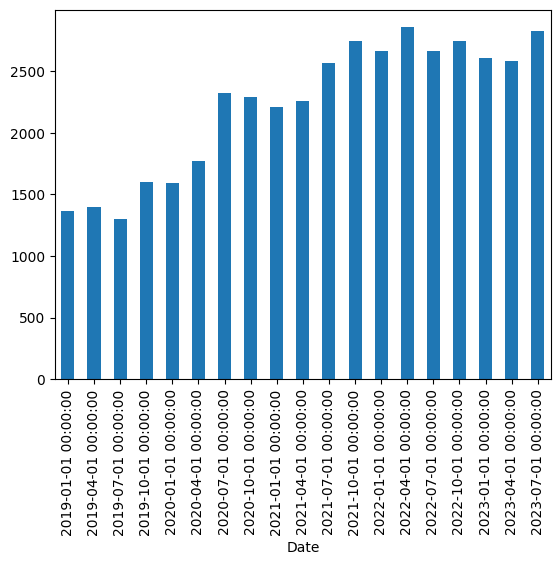

In [25]:
shares1['Open'].resample(rule='QS').max().plot(kind='bar')

<Axes: xlabel='Date'>

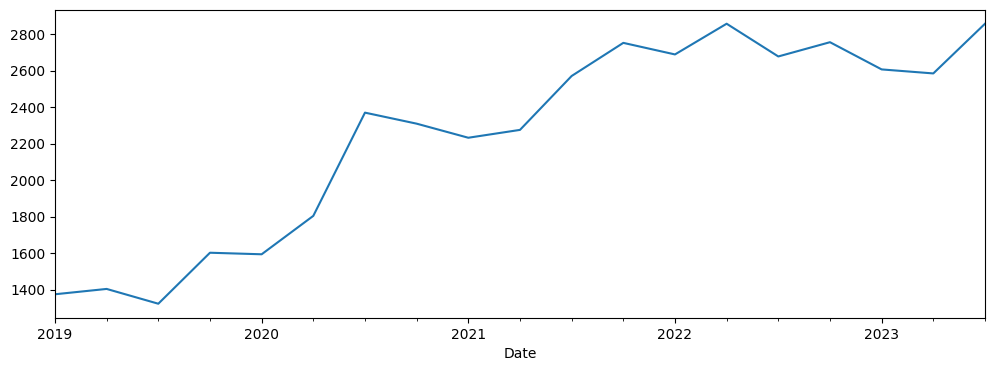

In [26]:
shares1.resample(rule='QS').max()['High'].plot(figsize=(12,4))

In [27]:
###Business End Frequency
shares1.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,1599.835205,1602.361206,1581.112671,1594.832642,1573.459717,48377710
2020-12-31,2325.000000,2369.350098,2310.550049,2324.550049,2302.009033,65848350
2021-12-31,2742.750000,2751.350098,2708.000000,2731.850098,2714.062744,42209687
2022-12-30,2856.149902,2856.149902,2786.100098,2819.850098,2801.489746,37841671
2023-12-29,2830.000000,2856.000000,2797.000000,2841.850098,2831.846680,28540942


<Axes: xlabel='Date'>

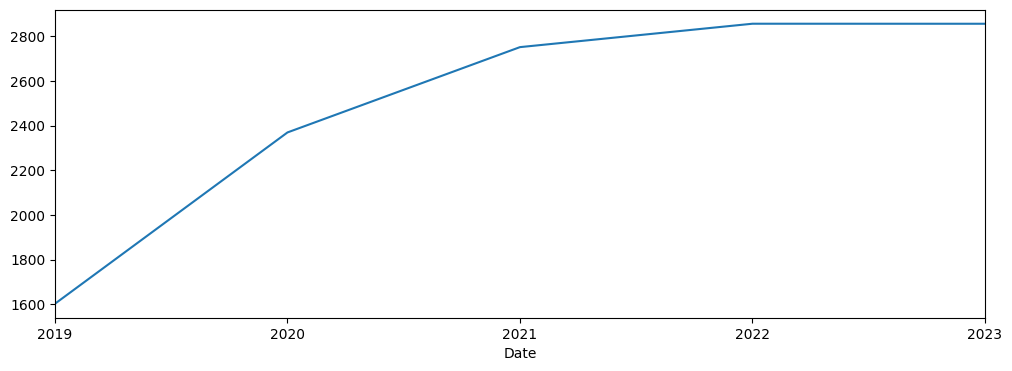

In [28]:
shares1.resample(rule='BA').max()['High'].plot(figsize=(12,4))

In [29]:
###Business Quarter Frequency
shares1.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1365.011108,1374.966675,1351.192017,1363.624146,1337.940552,25927601
2019-04-01,1394.729370,1404.189697,1389.479126,1395.620850,1369.334473,19692278
2019-07-01,1297.699097,1323.207275,1293.290894,1319.740234,1302.053833,48377710
2019-10-01,1599.835205,1602.361206,1581.112671,1594.832642,1573.459717,20092835
2020-01-01,1593.891479,1593.891479,1538.615479,1566.154419,1545.165771,40698294
2020-04-01,1773.400024,1804.199951,1735.000000,1759.400024,1735.821655,65848350
2020-07-01,2325.000000,2369.350098,2310.550049,2324.550049,2302.009033,64750460
2020-10-01,2290.000000,2309.000000,2268.500000,2287.500000,2265.318359,45857806
2021-01-01,2207.000000,2231.899902,2170.250000,2202.100098,2180.746582,25016570


<Axes: xlabel='Date'>

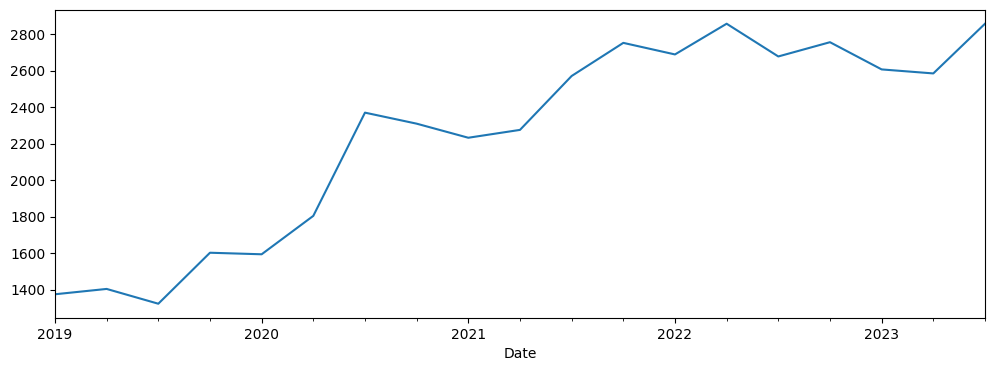

In [30]:
###Business End Frequency
shares1.resample(rule='BQS').max()['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

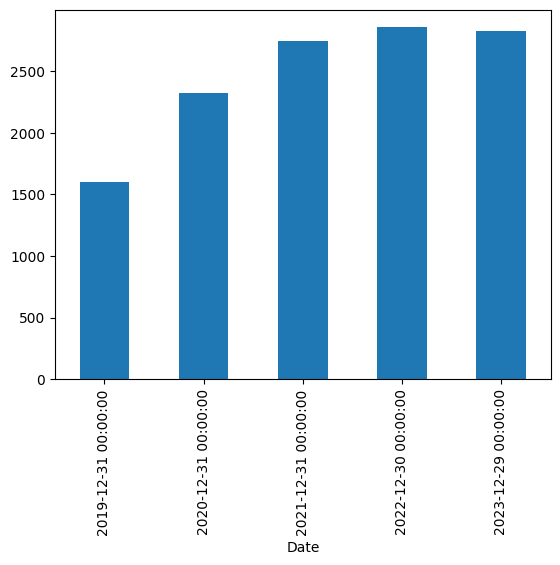

In [31]:
shares1['Open'].resample(rule='BA').max().plot(kind='bar')

<Axes: xlabel='Date'>

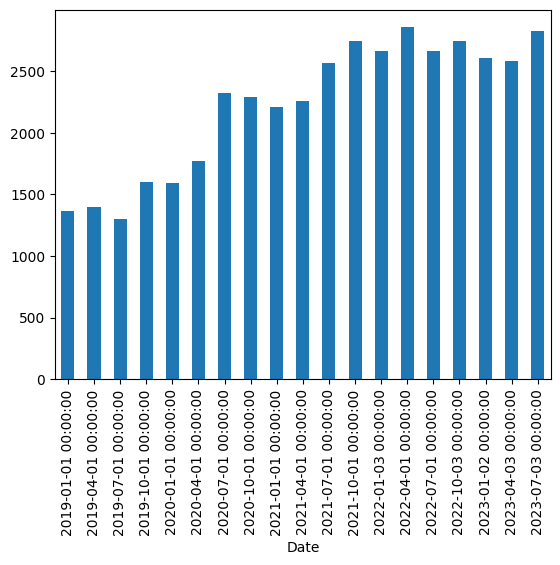

In [32]:
shares1['Open'].resample(rule='BQS').max().plot(kind='bar')

In [33]:
shares1['Open'].resample(rule='M').max()

Date
2019-01-31    1238.757813
2019-02-28    1297.946777
2019-03-31    1365.011108
2019-04-30    1384.872803
2019-05-31    1394.729370
2019-06-30    1349.111816
2019-07-31    1282.146484
2019-08-31    1291.755493
2019-09-30    1297.699097
2019-10-31    1470.065308
2019-11-30    1567.095459
2019-12-31    1599.835205
2020-01-31    1593.891479
2020-02-29    1482.943237
2020-03-31    1342.375610
2020-04-30    1440.297363
2020-05-31    1565.163818
2020-06-30    1773.400024
2020-07-31    2178.800049
2020-08-31    2174.000000
2020-09-30    2325.000000
2020-10-31    2290.000000
2020-11-30    2089.000000
2020-12-31    2021.599976
2021-01-31    2111.000000
2021-02-28    2117.000000
2021-03-31    2207.000000
2021-04-30    2024.949951
2021-05-31    2102.000000
2021-06-30    2261.000000
2021-07-31    2144.949951
2021-08-31    2276.899902
2021-09-30    2570.000000
2021-10-31    2742.750000
2021-11-30    2600.000000
2021-12-31    2498.399902
2022-01-31    2554.750000
2022-02-28    2444.399902
2022-03

<Axes: xlabel='Date'>

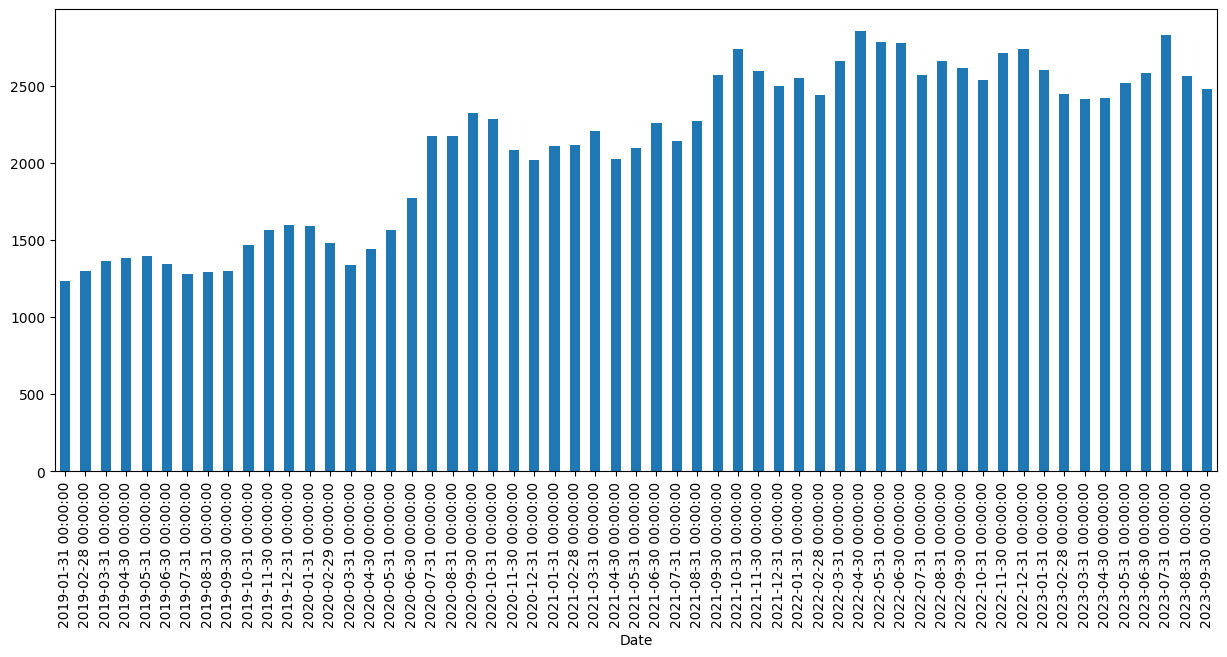

In [34]:
shares1['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [35]:
#Rolling
shares1['Open:30 days rolling']=shares1['Open'].rolling(30).mean()

In [36]:
shares1.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,NaN
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,NaN
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,NaN
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,NaN
2019-01-08,1094.723145,1099.527588,1085.708618,1094.277344,1073.666748,5678473,NaN
2019-01-09,1101.558350,1106.511353,1088.383179,1100.320068,1079.595581,5821468,NaN
2019-01-10,1097.348267,1100.567749,1092.642822,1097.100586,1076.436768,4118960,NaN
2019-01-11,1097.199585,1103.341431,1078.378052,1087.739258,1067.251831,6525174,NaN


<Axes: xlabel='Date'>

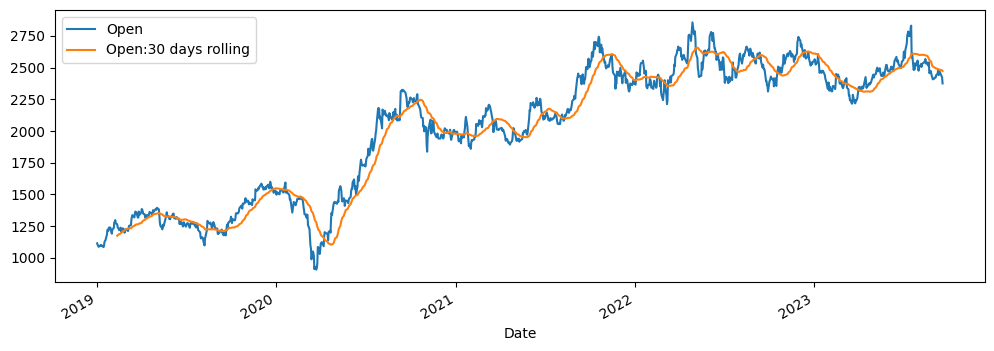

In [37]:
shares1[['Open','Open:30 days rolling']].plot(figsize=(12,4))

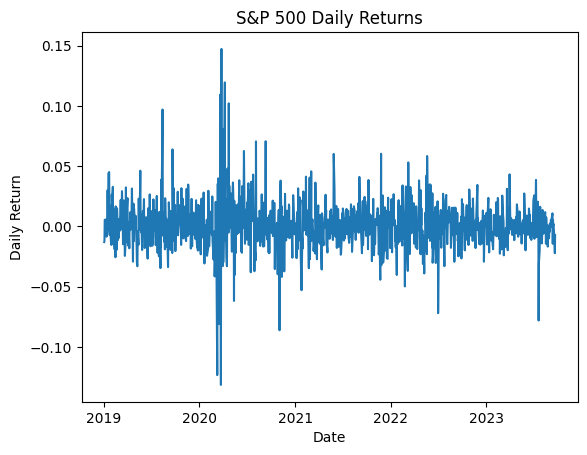

In [38]:
daily_returns = shares1['Close'].pct_change()

plt.plot(daily_returns.index, daily_returns.values)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

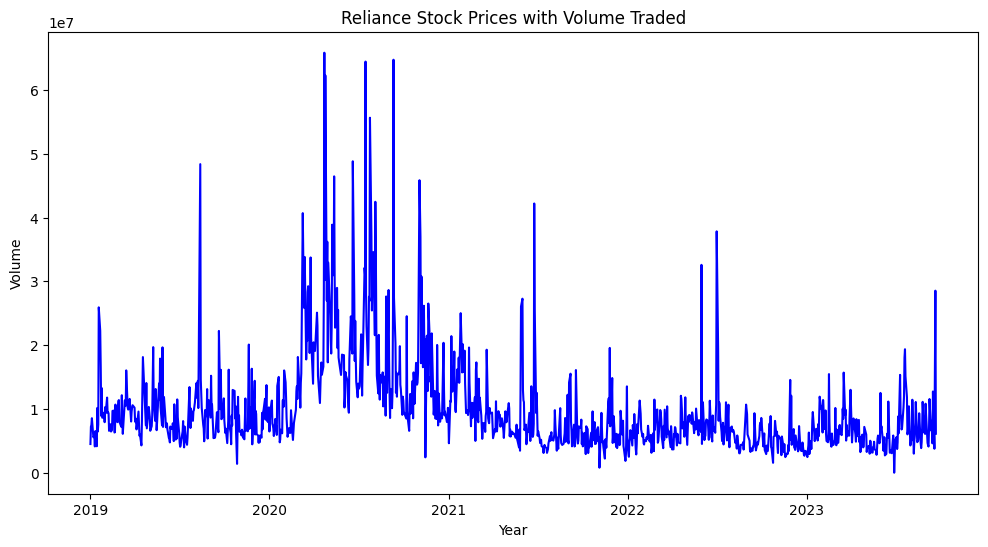

In [39]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Volume', data=shares1, color='b')
plt.title('Reliance Stock Prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

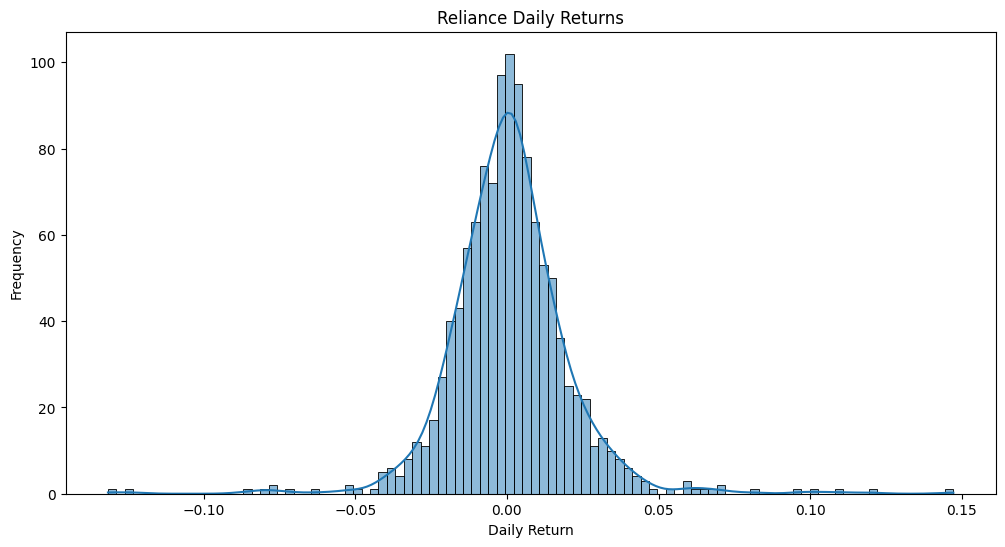

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(shares1['Close'].pct_change().dropna(), bins=100, kde=True)
plt.title('Reliance Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [41]:
#Simple Moving Average

In [42]:
shares1['Open:10 days rolling']=shares1['Open'].rolling(window=10,min_periods=1).mean()
shares1['Open:10 days rolling']

Date
2019-01-01    1114.683960
2019-01-02    1109.359436
2019-01-03    1105.273153
2019-01-04    1100.728729
2019-01-07    1099.904028
                 ...     
2023-09-14    2435.700000
2023-09-15    2441.844995
2023-09-18    2444.585010
2023-09-20    2444.890015
2023-09-21    2440.275000
Name: Open:10 days rolling, Length: 1169, dtype: float64

<Axes: xlabel='Date'>

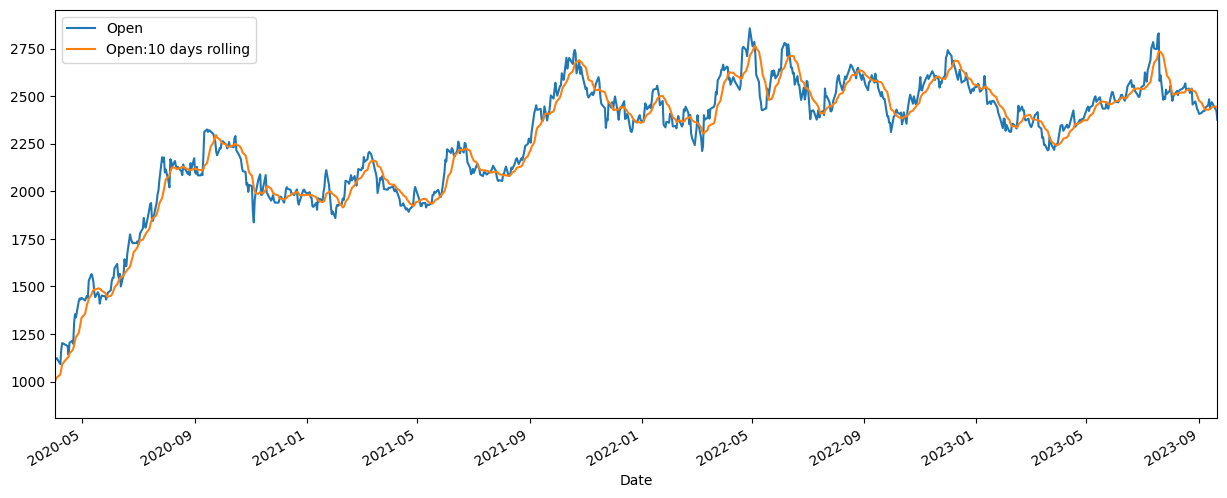

In [43]:
shares1[['Open','Open:10 days rolling']].plot(xlim=['2020-04-01','2023-09-21'],figsize=(15,6))

In [44]:
shares1['Open:30 days rolling']=shares1['Open'].rolling(window=30,min_periods=1).mean()
shares1['Open:50 days rolling']=shares1['Open'].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

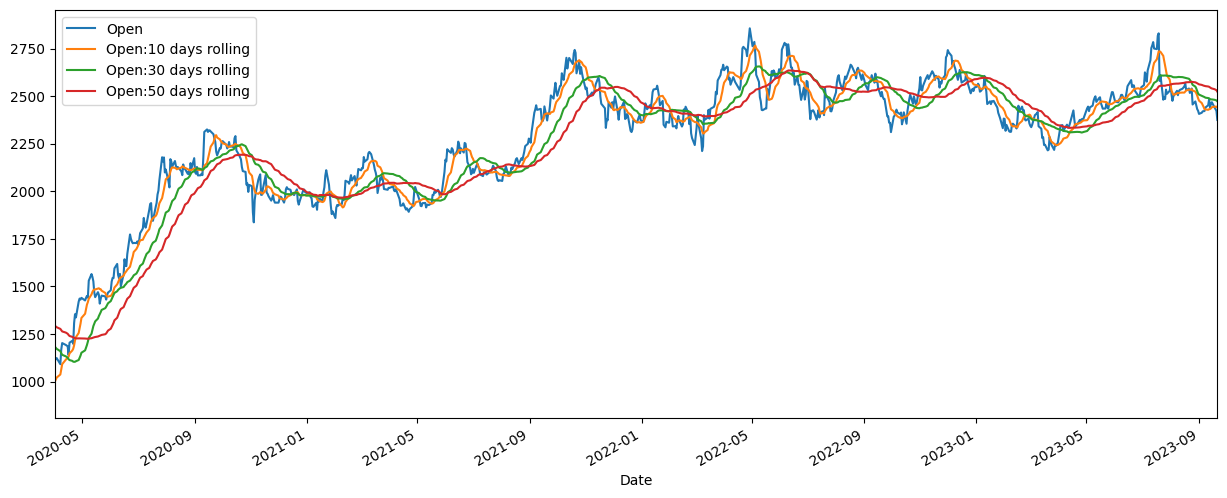

In [45]:
shares1[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-04-01','2023-09-21'],figsize=(15,6))

In [46]:
##Cumulative Moving Average(Expanding)

<Axes: xlabel='Date'>

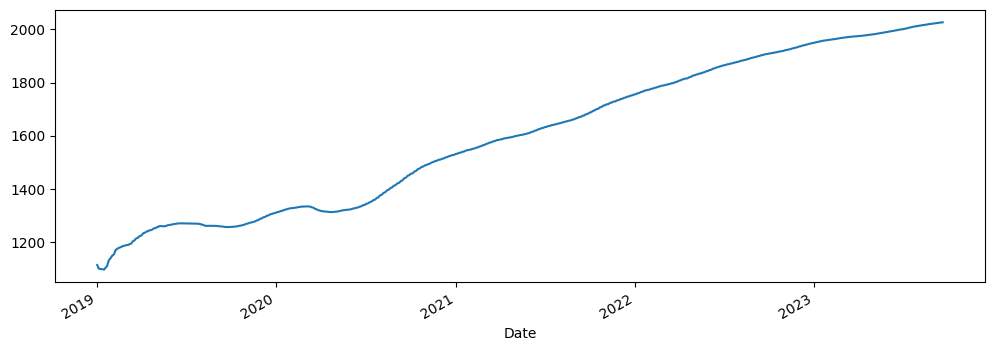

In [47]:
shares1['Open'].expanding().mean().plot(figsize=(12,4))

In [48]:
##Exponential Moving Average

In [49]:
#Consider smoothing factor=0.1
shares1['EMA_0.1']=shares1['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

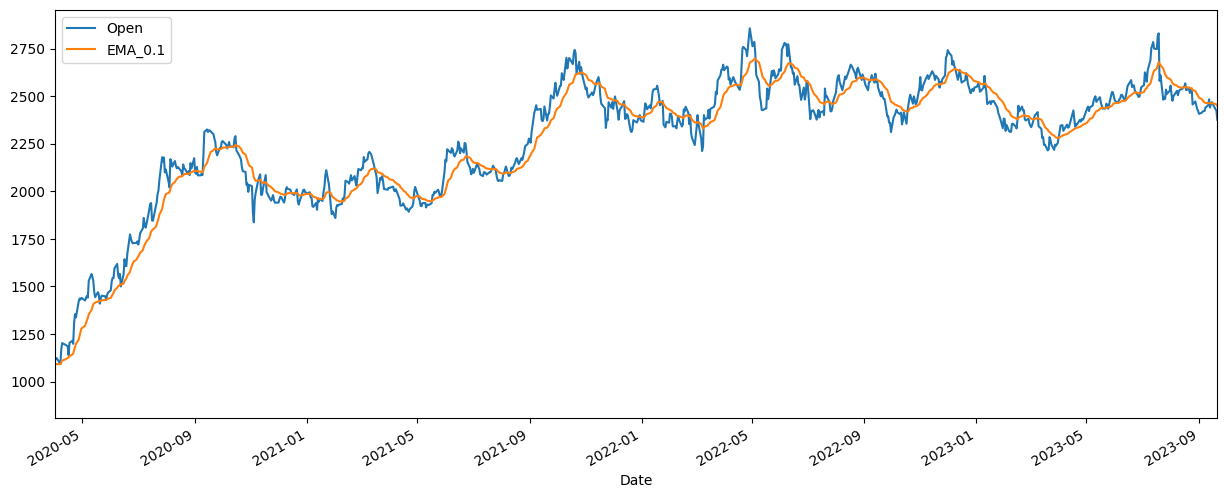

In [50]:
shares1[['Open','EMA_0.1']].plot(xlim=['2020-04-01','2023-09-21'],figsize=(15,6))

In [51]:
shares1['EMA_0.3']=shares1['Open'].ewm(alpha=0.3,adjust=False).mean()

<Axes: xlabel='Date'>

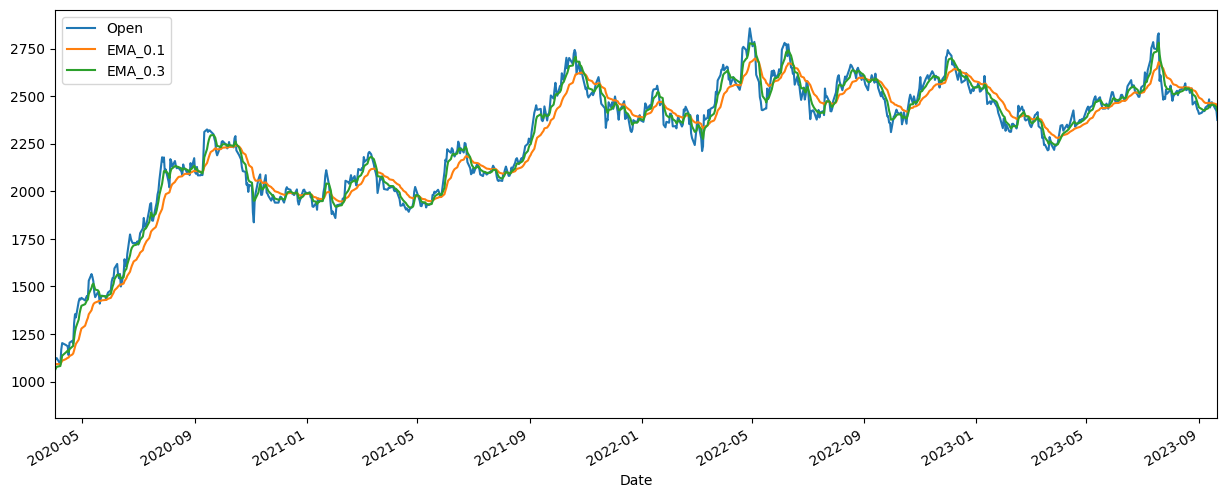

In [52]:
shares1[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-04-01','2023-09-21'],figsize=(15,6))

In [53]:
shares1['EMA_5days']=shares1['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

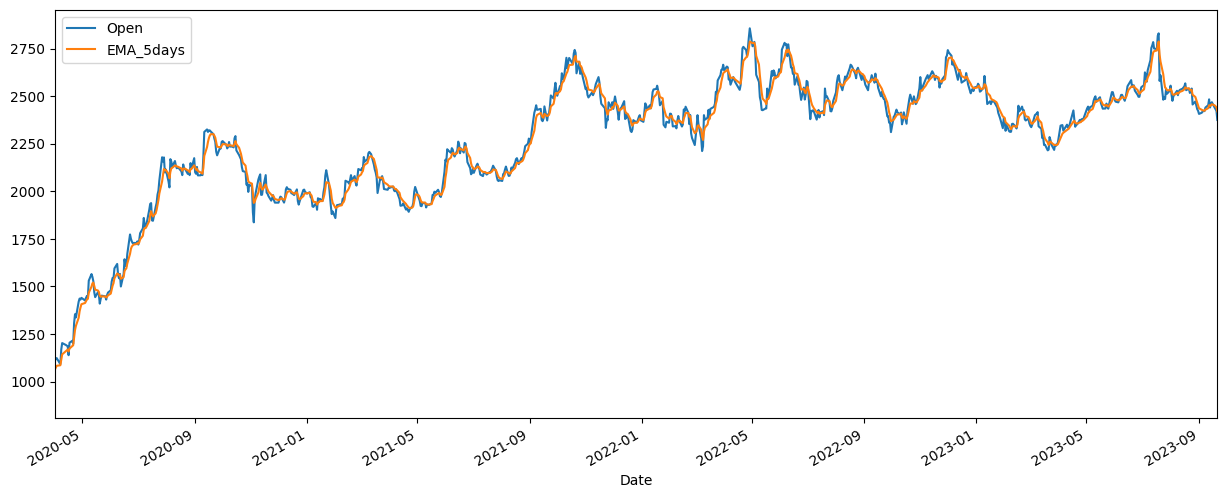

In [54]:
shares1[['Open','EMA_5days']].plot(xlim=['2020-04-01','2023-09-21'],figsize=(15,6))

<Axes: xlabel='Date'>

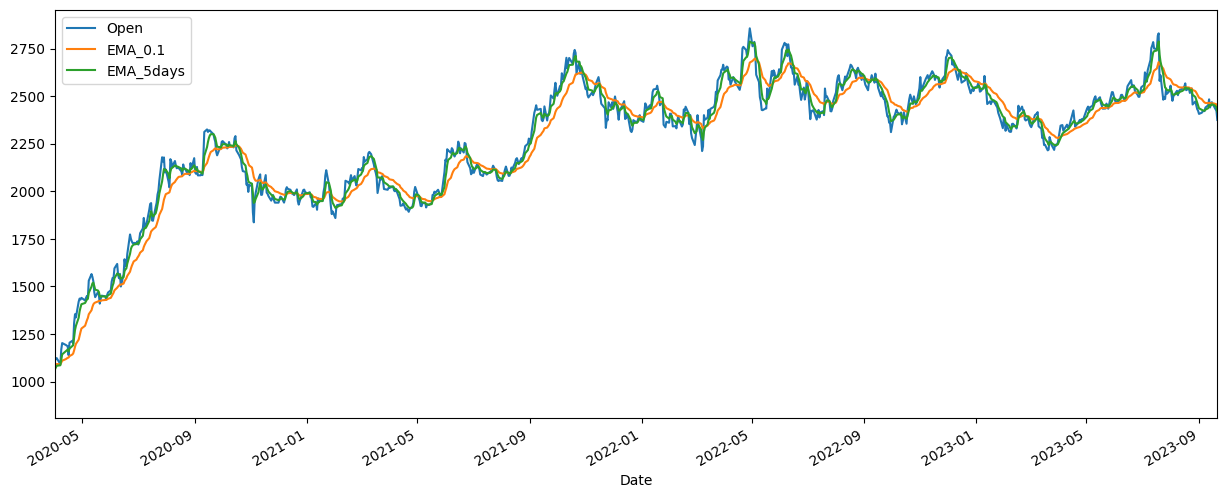

In [55]:
shares1[['Open','EMA_0.1','EMA_5days']].plot(xlim=['2020-04-01','2023-09-21'],figsize=(15,6))

In [56]:
shares2=shares1.drop(['Open:30 days rolling','Open:10 days rolling','Open:50 days rolling','EMA_0.1','EMA_0.3','EMA_5days'],axis=1)
shares2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822
...,...,...,...,...,...,...
2023-09-14,2460.000000,2465.800049,2445.000000,2453.300049,2453.300049,4604818
2023-09-15,2468.000000,2468.000000,2449.500000,2457.850098,2457.850098,12734296
2023-09-18,2440.050049,2451.000000,2432.050049,2436.449951,2436.449951,3758150


In [57]:
from statsmodels.tsa.stattools import adfuller

In [58]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [59]:
adf_test(shares2['Open'])

ADF Statistics: -1.799363249276954
p- value: 0.38077786846325135
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [60]:
adf_test(shares2['High'])

ADF Statistics: -1.8107962606003776
p- value: 0.37511497654156983
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [61]:
adf_test(shares2['Low'])

ADF Statistics: -1.8165944894720598
p- value: 0.37225466727880085
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [62]:
adf_test(shares2['Close'])

ADF Statistics: -1.779868842137795
p- value: 0.39050105781379335
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [63]:
adf_test(shares2['Adj Close'])

ADF Statistics: -1.760549527094951
p- value: 0.4002160641132684
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [64]:
adf_test(shares2['Volume'])

ADF Statistics: -4.16070388324129
p- value: 0.0007674198643882232
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [65]:
## Use Techniques Differencing
shares2['Open First Difference']=shares2['Open']-shares2['Open'].shift(1)

In [66]:
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference
Date,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766


In [67]:
adf_test(shares2['Open First Difference'].dropna())

ADF Statistics: -34.44784088651342
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [68]:
shares2['Open 12 Difference']=shares2['Open']-shares2['Open'].shift(12)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference
Date,,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048,NaN
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326,NaN
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127,NaN
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766,NaN


In [69]:
adf_test(shares2['Open 12 Difference'].dropna())

ADF Statistics: -7.391315702079256
p- value: 7.987041889894979e-11
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [70]:
shares2['High First Difference']=shares2['High']-shares2['High'].shift(1)
shares2

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference
Date,,,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN,NaN,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048,NaN,-0.297242
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326,NaN,-12.283569
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127,NaN,-10.054687
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766,NaN,13.868530
...,...,...,...,...,...,...,...,...,...
2023-09-14,2460.000000,2465.800049,2445.000000,2453.300049,2453.300049,4604818,20.000000,7.949951,3.150147
2023-09-15,2468.000000,2468.000000,2449.500000,2457.850098,2457.850098,12734296,8.000000,36.000000,2.199951
2023-09-18,2440.050049,2451.000000,2432.050049,2436.449951,2436.449951,3758150,-27.949951,17.050049,-17.000000


In [71]:
adf_test(shares2['High First Difference'].dropna())

ADF Statistics: -30.378871084789154
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [72]:
shares2['High 12 Difference']=shares2['High']-shares2['High'].shift(12)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference
Date,,,,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN,NaN,NaN,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048,NaN,-0.297242,NaN
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326,NaN,-12.283569,NaN
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127,NaN,-10.054687,NaN
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766,NaN,13.868530,NaN


In [73]:
adf_test(shares2['High 12 Difference'].dropna())

ADF Statistics: -5.90579833928501
p- value: 2.710591472371766e-07
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [74]:
shares2['Low First Difference']=shares2['Low']-shares2['Low'].shift(1)
shares2

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference
Date,,,,,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN,NaN,NaN,NaN,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048,NaN,-0.297242,NaN,-9.014526
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326,NaN,-12.283569,NaN,-10.797607
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127,NaN,-10.054687,NaN,-8.915528
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766,NaN,13.868530,NaN,19.713135
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-14,2460.000000,2465.800049,2445.000000,2453.300049,2453.300049,4604818,20.000000,7.949951,3.150147,12.350098,18.750000
2023-09-15,2468.000000,2468.000000,2449.500000,2457.850098,2457.850098,12734296,8.000000,36.000000,2.199951,25.000000,4.500000
2023-09-18,2440.050049,2451.000000,2432.050049,2436.449951,2436.449951,3758150,-27.949951,17.050049,-17.000000,26.000000,-17.449951


In [75]:
adf_test(shares2['Low First Difference'].dropna())

ADF Statistics: -23.135221586747356
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [76]:
shares2['Low 12 Difference']=shares2['Low']-shares2['Low'].shift(12)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference
Date,,,,,,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048,NaN,-0.297242,NaN,-9.014526,NaN
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326,NaN,-12.283569,NaN,-10.797607,NaN
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127,NaN,-10.054687,NaN,-8.915528,NaN
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766,NaN,13.868530,NaN,19.713135,NaN


In [77]:
adf_test(shares2['Low 12 Difference'].dropna())

ADF Statistics: -6.9062187908817405
p- value: 1.2453140517490008e-09
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [78]:
shares2['Close First Difference']=shares2['Close']-shares2['Close'].shift(1)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference
Date,,,,,,,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048,NaN,-0.297242,NaN,-9.014526,NaN,-14.463013
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326,NaN,-12.283569,NaN,-10.797607,NaN,-13.521728
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127,NaN,-10.054687,NaN,-8.915528,NaN,5.844604
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766,NaN,13.868530,NaN,19.713135,NaN,6.042725


In [79]:
adf_test(shares2['Close First Difference'].dropna())

ADF Statistics: -15.131695240587613
p- value: 7.21643357665615e-28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [80]:
shares2['Close 12 Difference']=shares2['Close']-shares2['Close'].shift(12)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference
Date,,,,,,,,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048,NaN,-0.297242,NaN,-9.014526,NaN,-14.463013,NaN
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326,NaN,-12.283569,NaN,-10.797607,NaN,-13.521728,NaN
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127,NaN,-10.054687,NaN,-8.915528,NaN,5.844604,NaN
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766,NaN,13.868530,NaN,19.713135,NaN,6.042725,NaN


In [81]:
adf_test(shares2['Close 12 Difference'].dropna())

ADF Statistics: -6.9876694525666565
p- value: 7.891791661087584e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [82]:
shares2['Adj Close First Difference']=shares2['Adj Close']-shares2['Adj Close'].shift(1)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference
Date,,,,,,,,,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048,NaN,-0.297242,NaN,-9.014526,NaN,-14.463013,NaN,-14.190674
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326,NaN,-12.283569,NaN,-10.797607,NaN,-13.521728,NaN,-13.266968
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127,NaN,-10.054687,NaN,-8.915528,NaN,5.844604,NaN,5.734497
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766,NaN,13.868530,NaN,19.713135,NaN,6.042725,NaN,5.928955


In [83]:
adf_test(shares2['Adj Close First Difference'].dropna())

ADF Statistics: -15.138096768481686
p- value: 7.074518703219995e-28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [84]:
shares2['Adj Close 12 Difference']=shares2['Adj Close']-shares2['Adj Close'].shift(12)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference,Adj Close 12 Difference
Date,,,,,,,,,,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048,NaN,-0.297242,NaN,-9.014526,NaN,-14.463013,NaN,-14.190674,NaN
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326,NaN,-12.283569,NaN,-10.797607,NaN,-13.521728,NaN,-13.266968,NaN
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127,NaN,-10.054687,NaN,-8.915528,NaN,5.844604,NaN,5.734497,NaN
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766,NaN,13.868530,NaN,19.713135,NaN,6.042725,NaN,5.928955,NaN


In [85]:
adf_test(shares2['Adj Close 12 Difference'].dropna())

ADF Statistics: -6.990857154732026
p- value: 7.751807959718021e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [86]:
shares2['Volume First Difference']=shares2['Volume']-shares2['Volume'].shift(1)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference,Adj Close 12 Difference,Volume First Difference
Date,,,,,,,,,,,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048,NaN,-0.297242,NaN,-9.014526,NaN,-14.463013,NaN,-14.190674,NaN,2714610.0
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326,NaN,-12.283569,NaN,-10.797607,NaN,-13.521728,NaN,-13.266968,NaN,304344.0
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127,NaN,-10.054687,NaN,-8.915528,NaN,5.844604,NaN,5.734497,NaN,1028341.0
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766,NaN,13.868530,NaN,19.713135,NaN,6.042725,NaN,5.928955,NaN,-2979560.0


In [87]:
adf_test(shares2['Volume First Difference'].dropna())

ADF Statistics: -10.607010835701976
p- value: 5.966684971728884e-19
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [88]:
shares2['Volume 12 Difference']=shares2['Volume']-shares2['Volume'].shift(12)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference,Adj Close 12 Difference,Volume First Difference,Volume 12 Difference
Date,,,,,,,,,,,,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048,NaN,-0.297242,NaN,-9.014526,NaN,-14.463013,NaN,-14.190674,NaN,2714610.0,NaN
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326,NaN,-12.283569,NaN,-10.797607,NaN,-13.521728,NaN,-13.266968,NaN,304344.0,NaN
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127,NaN,-10.054687,NaN,-8.915528,NaN,5.844604,NaN,5.734497,NaN,1028341.0,NaN
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766,NaN,13.868530,NaN,19.713135,NaN,6.042725,NaN,5.928955,NaN,-2979560.0,NaN


In [89]:
adf_test(shares2['Volume 12 Difference'].dropna())

ADF Statistics: -12.104346099489604
p- value: 1.9848195181894966e-22
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [90]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

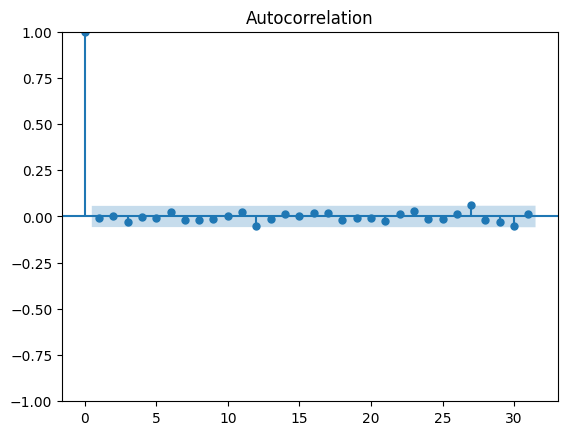

In [91]:
acf_open1=plot_acf(shares2['Open First Difference'].dropna())

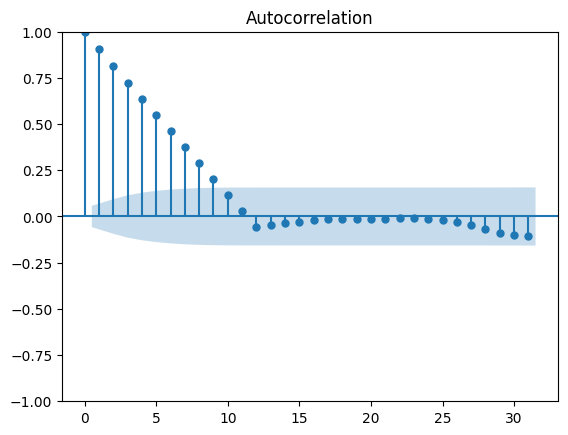

In [92]:
acf_open12=plot_acf(shares2['Open 12 Difference'].dropna())

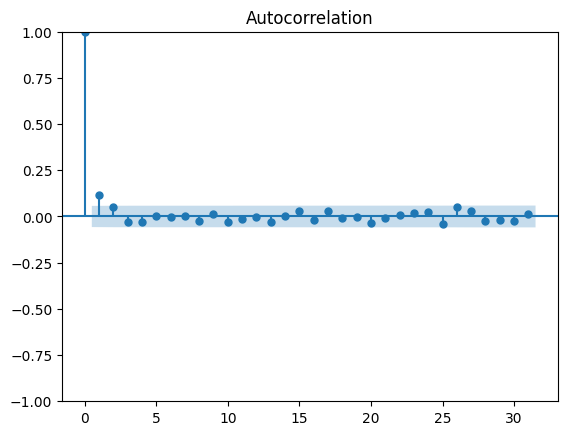

In [93]:
acf_high1=plot_acf(shares2['High First Difference'].dropna())

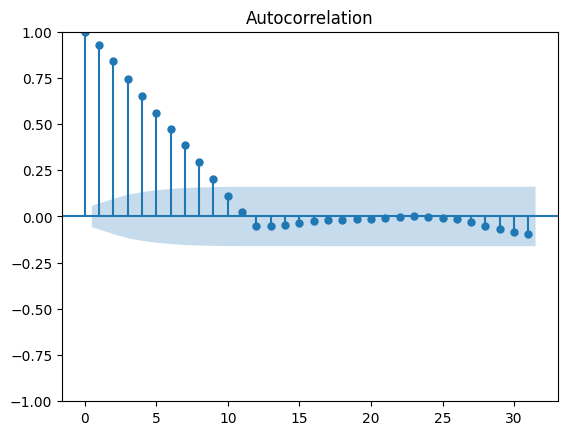

In [94]:
acf_high12=plot_acf(shares2['High 12 Difference'].dropna())

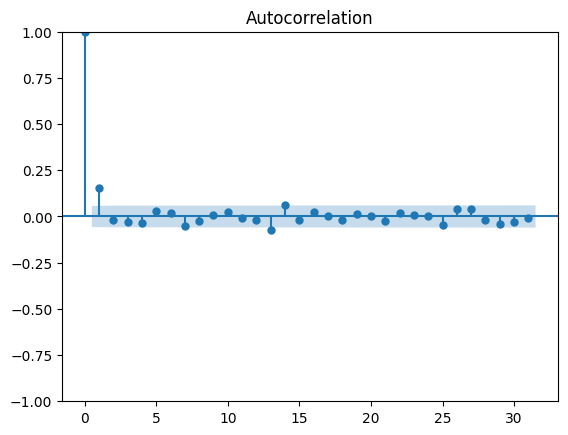

In [95]:
acf_low1=plot_acf(shares2['Low First Difference'].dropna())

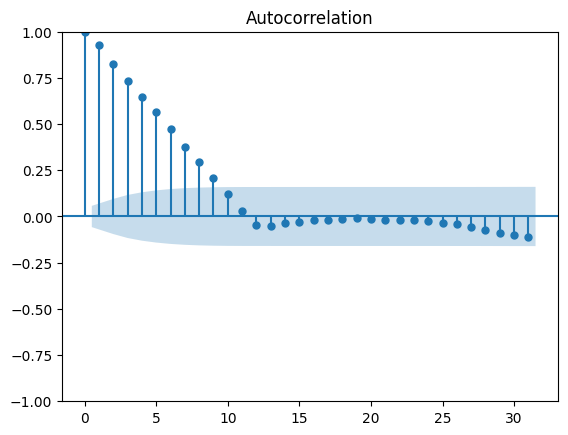

In [96]:
acf_low12=plot_acf(shares2['Low 12 Difference'].dropna())

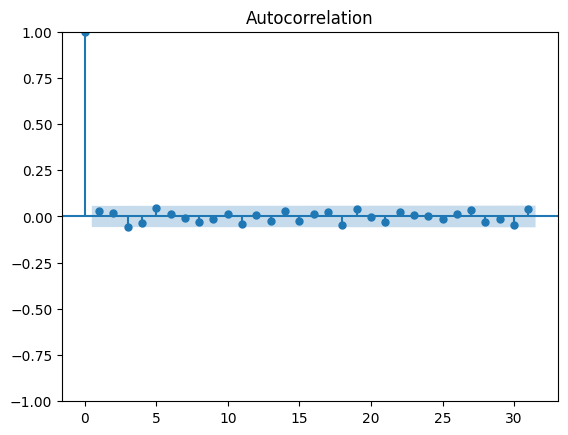

In [97]:
acf_close1=plot_acf(shares2['Close First Difference'].dropna())

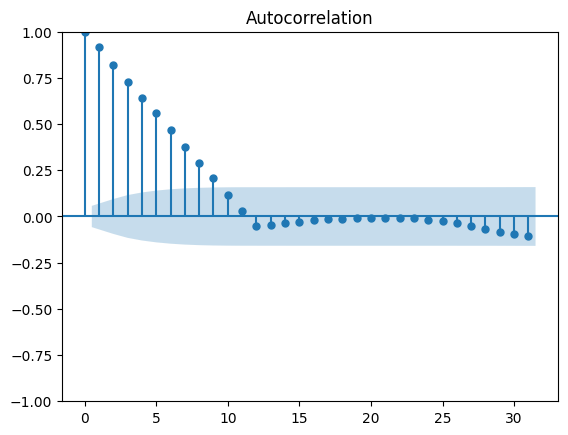

In [98]:
acf_close12=plot_acf(shares2['Close 12 Difference'].dropna())

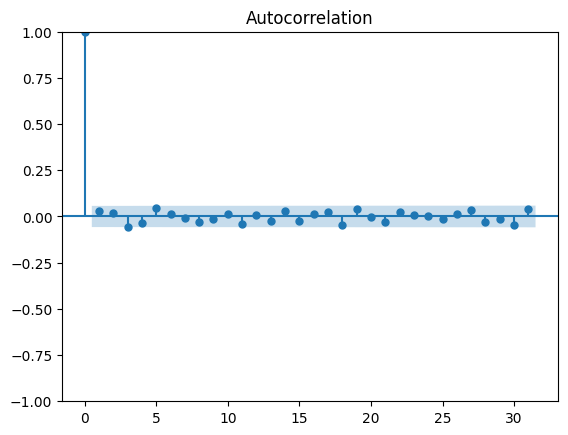

In [99]:
acf_adj1=plot_acf(shares2['Adj Close First Difference'].dropna())

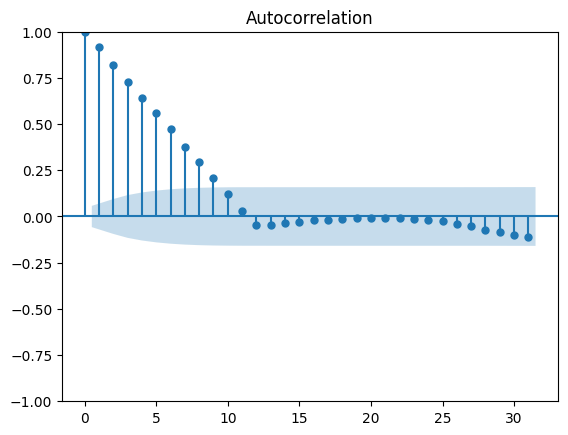

In [100]:
acf_adj12=plot_acf(shares2['Adj Close 12 Difference'].dropna())

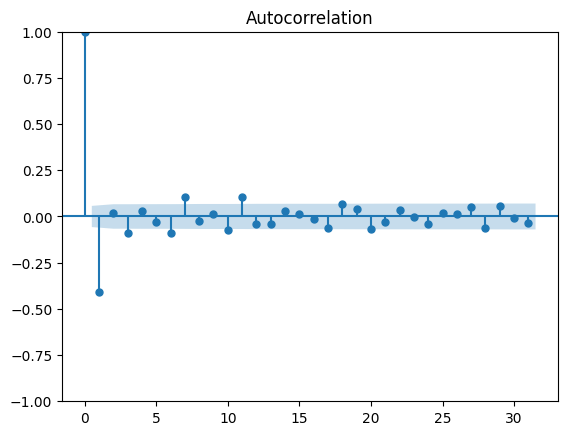

In [101]:
acf_vol1=plot_acf(shares2['Volume First Difference'].dropna())

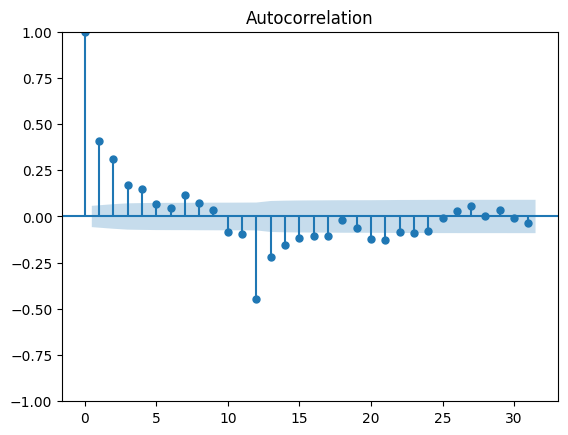

In [102]:
acf_vol12=plot_acf(shares2['Volume 12 Difference'].dropna())

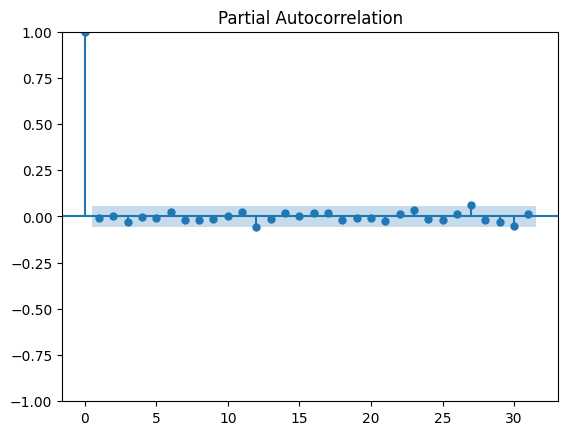

In [103]:
pacf_open1=plot_pacf(shares2['Open First Difference'].dropna())

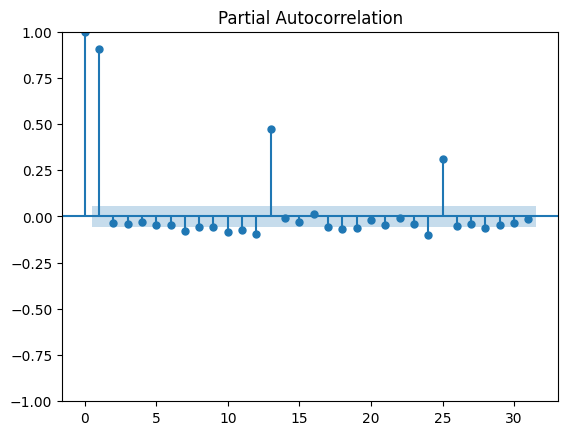

In [104]:
pacf_open12=plot_pacf(shares2['Open 12 Difference'].dropna())

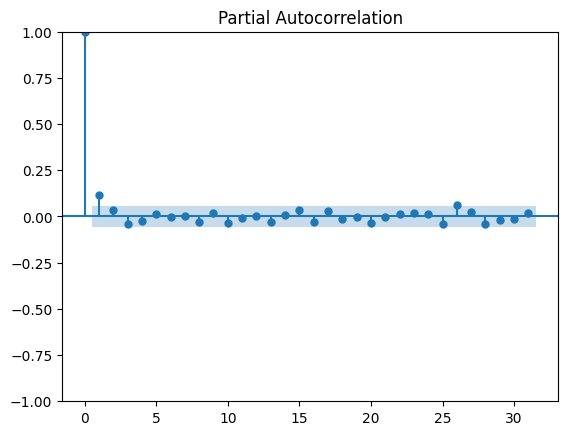

In [105]:
pacf_high1=plot_pacf(shares2['High First Difference'].dropna())

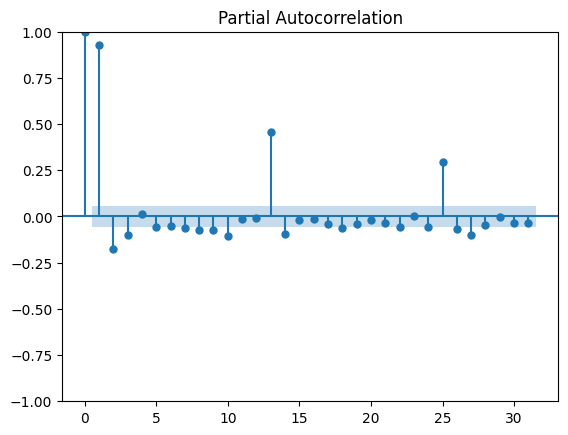

In [106]:
pacf_high12=plot_pacf(shares2['High 12 Difference'].dropna())

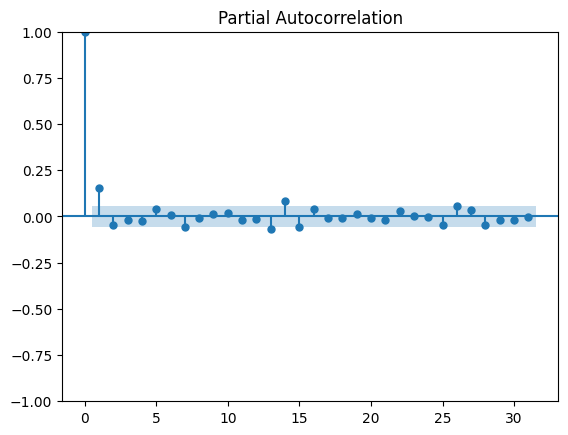

In [107]:
pacf_low1=plot_pacf(shares2['Low First Difference'].dropna())

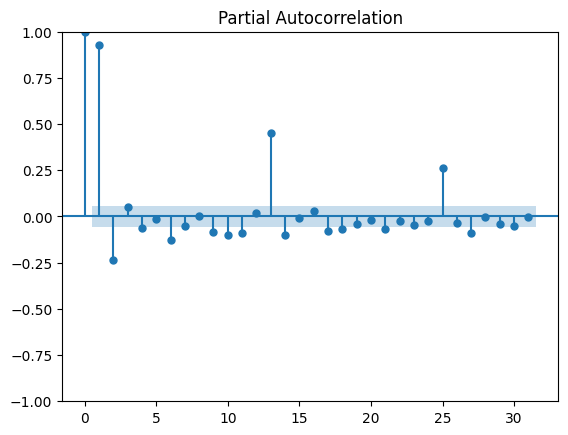

In [108]:
pacf_low12=plot_pacf(shares2['Low 12 Difference'].dropna())

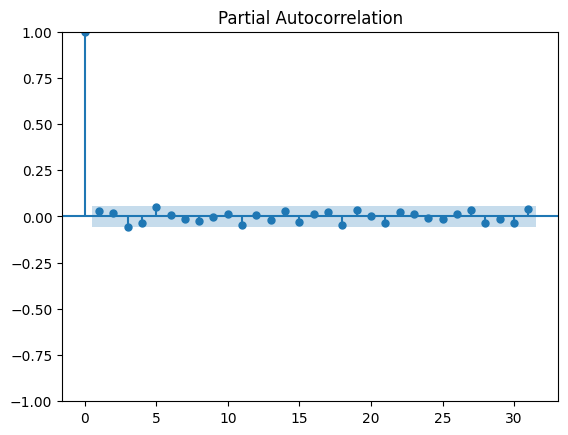

In [109]:
pacf_close1=plot_pacf(shares2['Close First Difference'].dropna())

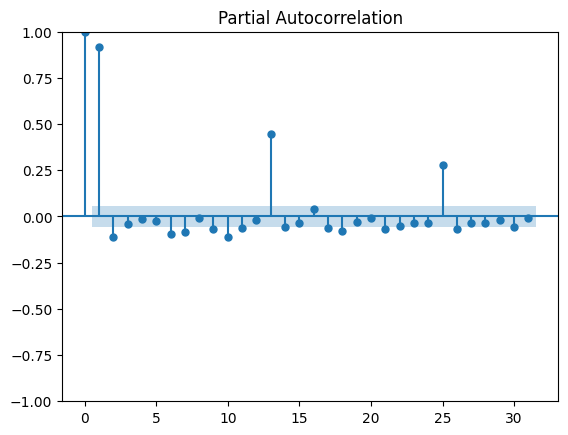

In [110]:
pacf_close12=plot_pacf(shares2['Close 12 Difference'].dropna())

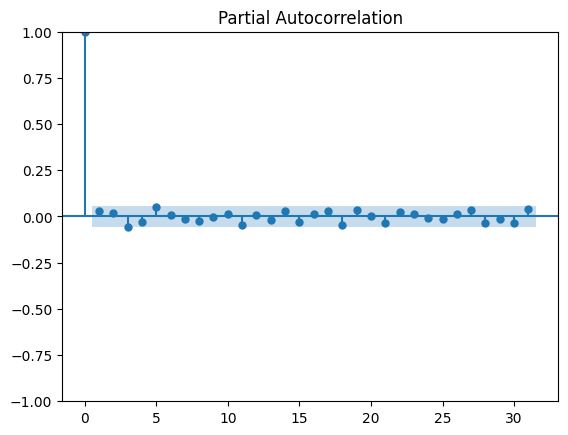

In [111]:
pacf_adj1=plot_pacf(shares2['Adj Close First Difference'].dropna())

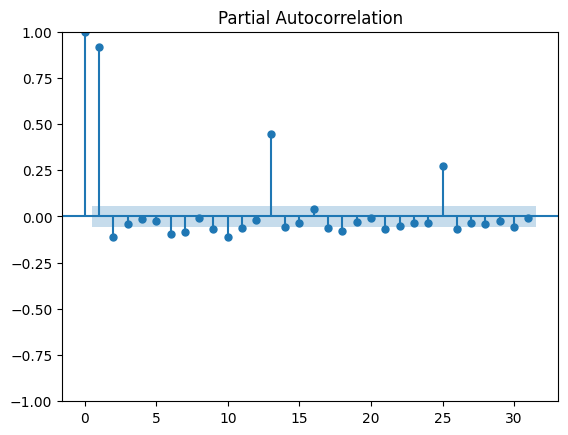

In [112]:
pacf_adj12=plot_pacf(shares2['Adj Close 12 Difference'].dropna())

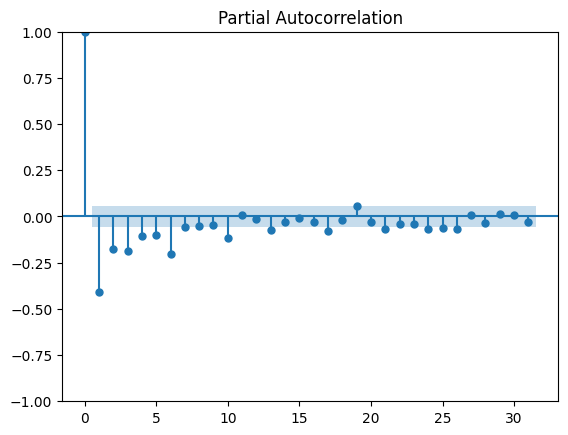

In [113]:
pacf_vol1=plot_pacf(shares2['Volume First Difference'].dropna())

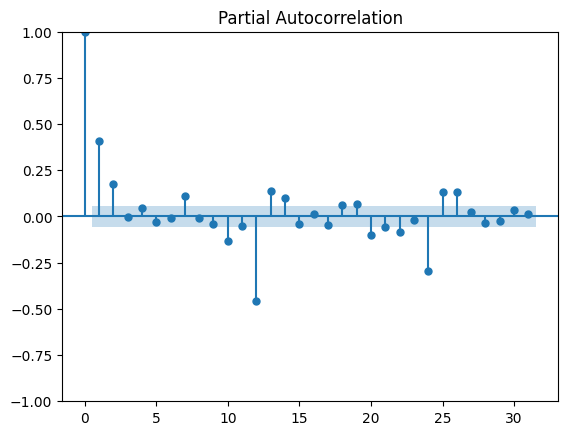

In [114]:
pacf_vol12=plot_pacf(shares2['Volume 12 Difference'].dropna())

In [115]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2022,12,31)
test_dataset_end=datetime(2023,9,21)

In [116]:
train_data=shares2[:train_dataset_end]
test_data=shares2[train_dataset_end+timedelta(days=1):test_dataset_end]

In [117]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [118]:
test_data

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference,Adj Close 12 Difference,Volume First Difference,Volume 12 Difference
Date,,,,,,,,,,,,,,,,,,
2023-01-02,2550.000000,2579.000000,2548.199951,2575.899902,2566.832764,2453414,4.899902,-52.500000,2.000000,-36.000000,7.099853,-22.800049,28.699951,-2.450196,28.598877,-2.441406,-910678.0,-1556351.0
2023-01-03,2565.050049,2573.000000,2547.800049,2557.050049,2548.049316,3534596,15.050049,-5.949951,-6.000000,-45.800049,-0.399902,-10.349853,-18.849853,-8.550049,-18.783448,-8.519776,1081182.0,-3774338.0
2023-01-04,2557.000000,2561.050049,2514.000000,2518.550049,2509.684814,4275746,-8.050049,-24.000000,-11.949951,-42.949951,-33.800049,-52.699951,-38.500000,-80.750000,-38.364502,-80.465577,741150.0,708383.0
2023-01-05,2523.500000,2536.399902,2504.000000,2514.050049,2505.200684,6293519,-33.500000,-60.399902,-24.650147,-89.600098,-10.000000,-62.000000,-4.500000,-107.750000,-4.484130,-107.370605,2017773.0,2847228.0
2023-01-06,2526.649902,2547.949951,2518.300049,2536.899902,2527.969971,2930338,3.149902,-94.350098,11.550049,-85.050049,14.300049,-57.800049,22.849853,-47.600098,22.769287,-47.432617,-3363181.0,-1005125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-14,2460.000000,2465.800049,2445.000000,2453.300049,2453.300049,4604818,20.000000,7.949951,3.150147,12.350098,18.750000,36.850098,2.250000,32.949951,2.250000,32.949951,-1796851.0,-3833504.0
2023-09-15,2468.000000,2468.000000,2449.500000,2457.850098,2457.850098,12734296,8.000000,36.000000,2.199951,25.000000,4.500000,34.500000,4.550049,39.800049,4.550049,39.800049,8129478.0,6649823.0
2023-09-18,2440.050049,2451.000000,2432.050049,2436.449951,2436.449951,3758150,-27.949951,17.050049,-17.000000,26.000000,-17.449951,32.150147,-21.400147,29.449951,-21.400147,29.449951,-8976146.0,-7061150.0


In [119]:
test_data

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference,Adj Close 12 Difference,Volume First Difference,Volume 12 Difference
Date,,,,,,,,,,,,,,,,,,
2023-01-02,2550.000000,2579.000000,2548.199951,2575.899902,2566.832764,2453414,4.899902,-52.500000,2.000000,-36.000000,7.099853,-22.800049,28.699951,-2.450196,28.598877,-2.441406,-910678.0,-1556351.0
2023-01-03,2565.050049,2573.000000,2547.800049,2557.050049,2548.049316,3534596,15.050049,-5.949951,-6.000000,-45.800049,-0.399902,-10.349853,-18.849853,-8.550049,-18.783448,-8.519776,1081182.0,-3774338.0
2023-01-04,2557.000000,2561.050049,2514.000000,2518.550049,2509.684814,4275746,-8.050049,-24.000000,-11.949951,-42.949951,-33.800049,-52.699951,-38.500000,-80.750000,-38.364502,-80.465577,741150.0,708383.0
2023-01-05,2523.500000,2536.399902,2504.000000,2514.050049,2505.200684,6293519,-33.500000,-60.399902,-24.650147,-89.600098,-10.000000,-62.000000,-4.500000,-107.750000,-4.484130,-107.370605,2017773.0,2847228.0
2023-01-06,2526.649902,2547.949951,2518.300049,2536.899902,2527.969971,2930338,3.149902,-94.350098,11.550049,-85.050049,14.300049,-57.800049,22.849853,-47.600098,22.769287,-47.432617,-3363181.0,-1005125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-14,2460.000000,2465.800049,2445.000000,2453.300049,2453.300049,4604818,20.000000,7.949951,3.150147,12.350098,18.750000,36.850098,2.250000,32.949951,2.250000,32.949951,-1796851.0,-3833504.0
2023-09-15,2468.000000,2468.000000,2449.500000,2457.850098,2457.850098,12734296,8.000000,36.000000,2.199951,25.000000,4.500000,34.500000,4.550049,39.800049,4.550049,39.800049,8129478.0,6649823.0
2023-09-18,2440.050049,2451.000000,2432.050049,2436.449951,2436.449951,3758150,-27.949951,17.050049,-17.000000,26.000000,-17.449951,32.150147,-21.400147,29.449951,-21.400147,29.449951,-8976146.0,-7061150.0


In [120]:
train_data

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference,Adj Close 12 Difference,Volume First Difference,Volume 12 Difference
Date,,,,,,,,,,,,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697,-10.649048,NaN,-0.297242,NaN,-9.014526,NaN,-14.463013,NaN,-14.190674,NaN,2714610.0,NaN
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-6.934326,NaN,-12.283569,NaN,-10.797607,NaN,-13.521728,NaN,-13.266968,NaN,304344.0,NaN
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,-10.005127,NaN,-10.054687,NaN,-8.915528,NaN,5.844604,NaN,5.734497,NaN,1028341.0,NaN
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822,9.509766,NaN,13.868530,NaN,19.713135,NaN,6.042725,NaN,5.928955,NaN,-2979560.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,2514.750000,2542.000000,2492.399902,2524.050049,2515.165283,2764496,-48.550049,-145.250000,-48.500000,-123.000000,0.149902,-147.700196,21.850098,-125.199951,21.773193,-124.759278,-1969161.0,-815362.0
2022-12-27,2530.000000,2548.800049,2515.250000,2544.699951,2535.742676,2659749,15.250000,-116.000000,6.800049,-111.199951,22.850098,-86.600098,20.649902,-64.400147,20.577393,-64.173340,-104747.0,-3180884.0
2022-12-28,2538.000000,2549.800049,2521.500000,2544.449951,2535.493408,3442509,8.000000,-47.500000,1.000000,-73.199951,6.250000,-63.500000,-0.250000,-68.650147,-0.249268,-68.408447,782760.0,-932437.0


In [121]:
from statsmodels.tsa.arima.model import ARIMA

In [122]:
model_ARIMA=ARIMA(train_data['Volume'],order=(10,1,0))

In [123]:
model_Arima_fit=model_ARIMA.fit()

In [124]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Volume   No. Observations:                  990
Model:                ARIMA(10, 1, 0)   Log Likelihood              -16753.028
Date:                Fri, 13 Oct 2023   AIC                          33528.056
Time:                        10:27:07   BIC                          33581.920
Sample:                             0   HQIC                         33548.539
                                - 990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5766      0.022    -26.799      0.000      -0.619      -0.534
ar.L2         -0.3811      0.021    -17.917      0.000      -0.423      -0.339
ar.L3         -0.3642      0.025    -14.442      0.000      -0.414      -0.315
ar.L4         -0.2885      0.033     -8.735      0.000      -0.353      -0.224
ar.L5         -0.2918      0.034     -8.653      0.000      -0.358      -0.226
ar.L6         -0.3024      0.035     -8.673      0.000      -0.371      -0.234
ar.L7         -0.1456      0.033     -4.375      0.000      -0.211      -0.080
ar.L8         -0.1199      0.035     -3.423      0.001      -0.189      -0.051
ar.L9         -0.1156      0.035     -3.285      0.001      -0.185      -0.047
ar.L10        -0.1245      0.025     -4.935      0.000      -0.174      -0.075
sigma2      3.048e+13   1.02e-15   2.99e+28      0.000    3.05e+13    3.05e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             15041.31
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             3.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.09e+43. Standard errors may be unstable.
"""

If P<0.05, it means that it has a higher impact.
Here, from the observation we notiiced that the Volume column is having a greater impact on the stock prices when compared to the other column.

In [125]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2023-01-02 00:00:00
2023-09-21 00:00:00


In [126]:
req_col = shares1[['Open','High','Low','Close','Adj Close','Volume']]
req_col.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1169 entries, 2019-01-01 to 2023-09-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1169 non-null   float64
 1   High       1169 non-null   float64
 2   Low        1169 non-null   float64
 3   Close      1169 non-null   float64
 4   Adj Close  1169 non-null   float64
 5   Volume     1169 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.2 KB


In [127]:
# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [128]:
# Split the data into training and testing sets
train_size = int(len(req_col) * 0.8)
train, test = req_col[:train_size], req_col[train_size:]

In [129]:
for i in range(1, 11):
    for column in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
        train[f'{column}_lag_{i}'] = train[column].shift(i)
        test[f'{column}_lag_{i}'] = test[column].shift(i)

In [130]:
train = train.dropna()
test = test.dropna()


In [131]:
train.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_lag_1,High_lag_1,Low_lag_1,Close_lag_1,...,Open_lag_9,High_lag_9,Low_lag_9,Close_lag_9,Adj Close_lag_9,Open_lag_10,High_lag_10,Low_lag_10,Close_lag_10,Adj Close_lag_10
count,925.000000,925.000000,925.000000,925.000000,925.000000,9.250000e+02,925.000000,925.000000,925.000000,925.000000,...,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000
mean,1921.005843,1943.773628,1897.006159,1919.198537,1900.771173,1.082672e+07,1919.635809,1942.377375,1895.636536,1917.805295,...,1908.449555,1931.028809,1884.531886,1906.601779,1888.056051,1907.102889,1929.665257,1883.204941,1905.280723,1886.721260
std,502.706728,506.750973,498.584140,502.478428,504.379755,8.060769e+06,503.257431,507.322009,499.097223,502.998961,...,507.023865,511.255872,502.711784,506.808100,508.633581,507.476365,511.744212,503.162065,507.289259,509.107526
min,907.596863,941.079529,867.427673,875.748779,864.012573,7.871600e+05,907.596863,941.079529,867.427673,875.748779,...,907.596863,941.079529,867.427673,875.748779,864.012573,907.596863,941.079529,867.427673,875.748779,864.012573
25%,1421.426270,1437.771362,1397.205933,1414.739624,1395.780151,5.995586e+06,1420.534790,1432.867798,1396.760132,1414.392944,...,1390.816406,1414.492065,1374.322754,1398.394653,1379.654175,1387.844604,1412.560303,1373.530273,1395.620850,1369.334473
50%,2008.000000,2030.000000,1982.800049,2002.300049,1982.884033,8.522215e+06,2007.949951,2028.500000,1982.550049,1997.300049,...,1997.000000,2015.000000,1978.150024,1993.750000,1974.416870,1996.400024,2014.250000,1978.099976,1993.250000,1973.921631
75%,2380.000000,2407.000000,2360.000000,2378.300049,2365.546631,1.254282e+07,2380.000000,2407.000000,2360.000000,2378.300049,...,2375.000000,2404.949951,2356.199951,2377.350098,2362.069336,2375.000000,2404.949951,2356.199951,2377.350098,2362.069336
max,2856.149902,2856.149902,2786.100098,2819.850098,2801.489746,6.584835e+07,2856.149902,2856.149902,2786.100098,2819.850098,...,2856.149902,2856.149902,2786.100098,2819.850098,2801.489746,2856.149902,2856.149902,2786.100098,2819.850098,2801.489746


In [132]:
req_col.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [133]:
# Define features and target
features = [col for col in train.columns if col != 'Volume']
X_train = train[features]
y_train = train['Volume']
X_test = test[features]
y_test = test['Volume']

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

In [135]:
#  Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [136]:
predictions = rf_model.predict(X_test)


In [137]:
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 3117900.4087844933


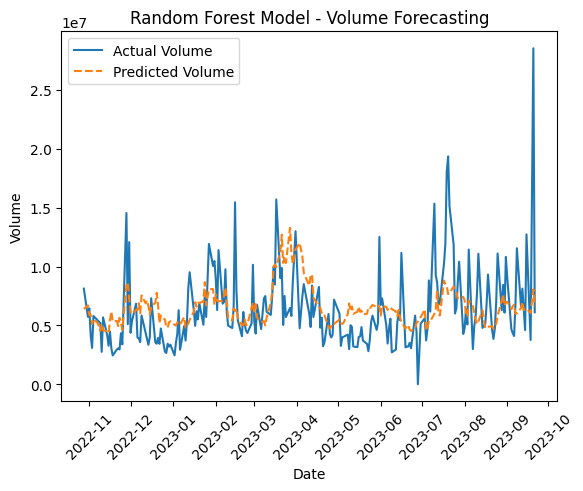

In [138]:
# Visualize the results
plt.plot(test.index, y_test, label='Actual Volume')
plt.plot(test.index, predictions, label='Predicted Volume', linestyle='dashed')
plt.title('Random Forest Model - Volume Forecasting')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [139]:
# Additional evaluation metric
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 2193682.505


In [140]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [141]:
train_size = int(len(req_col) * 0.8)
train, test = req_col[:train_size], req_col[train_size:]

In [142]:
for i in range(1, 11):
    for column in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
        train[f'{column}_lag_{i}'] = train[column].shift(i)
        test[f'{column}_lag_{i}'] = test[column].shift(i)


In [143]:
features = [col for col in train.columns if col != 'Volume']
X_train = train[features]
y_train = train['Volume']
X_test = test[features]
y_test = test['Volume']


In [144]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [145]:
predictions = xgb_model.predict(X_test)


In [146]:
# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Squared Error (RMSE): 3341685.753418192
Mean Absolute Error (MAE): 2309578.217948718


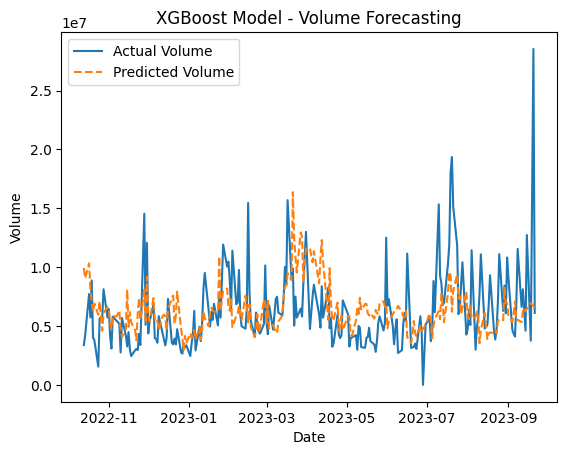

In [147]:
plt.plot(test.index, y_test, label='Actual Volume')
plt.plot(test.index, predictions, label='Predicted Volume', linestyle='dashed')
plt.title('XGBoost Model - Volume Forecasting')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [148]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [150]:
predictions = xgb_model.predict(X_test_scaled)


In [151]:
rmse = sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Root Mean Squared Error (RMSE): 3341685.753418192
Mean Absolute Error (MAE): 2309578.217948718
R-squared (R2): -0.004940287897254647


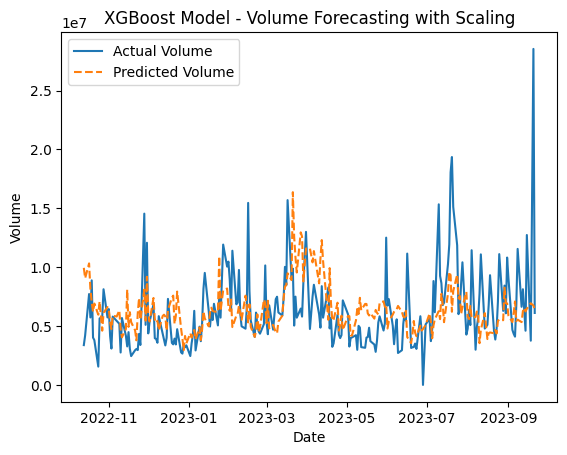

In [152]:
plt.plot(test.index, y_test, label='Actual Volume')
plt.plot(test.index, predictions, label='Predicted Volume', linestyle='dashed')
plt.title('XGBoost Model - Volume Forecasting with Scaling')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [153]:
train_size = int(len(req_col) * 0.8)
train, test = req_col[:train_size], req_col[train_size:]


In [154]:
for i in range(1, 11):
    for column in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
        train[f'{column}_lag_{i}'] = train[column].shift(i)
        test[f'{column}_lag_{i}'] = test[column].shift(i)


In [155]:
train = train.dropna()
test = test.dropna()


In [156]:
features = [col for col in train.columns if col != 'Close']
X_train = train[features]
y_train = train['Close']
X_test = test[features]
y_test = test['Close']

In [157]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [158]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [159]:
predictions = xgb_model.predict(X_test_scaled)


In [160]:
rmse = sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [161]:
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Root Mean Squared Error (RMSE): 10.717923188019899
Mean Absolute Error (MAE): 8.733410391252802
R-squared (R2): 0.9923754022814871


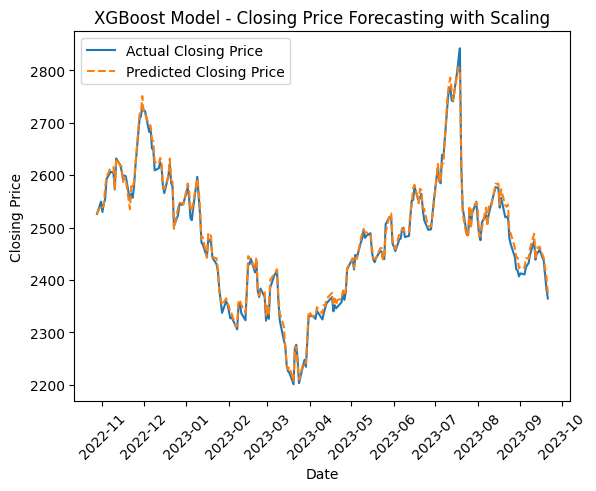

In [162]:
# Visualize the results
plt.plot(test.index, y_test, label='Actual Closing Price')
plt.plot(test.index, predictions, label='Predicted Closing Price', linestyle='dashed')
plt.title('XGBoost Model - Closing Price Forecasting with Scaling')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)

plt.show()

**Without Scaling**

In [163]:
train_size = int(len(req_col) * 0.8)
train, test = req_col[:train_size], req_col[train_size:]

In [164]:
for i in range(1, 11):
    for column in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
        train[f'{column}_lag_{i}'] = train[column].shift(i)
        test[f'{column}_lag_{i}'] = test[column].shift(i)

In [165]:
train = train.dropna()
test = test.dropna()

In [166]:
features = [col for col in train.columns if col != 'Close']
X_train = train[features]
y_train = train['Close']
X_test = test[features]
y_test = test['Close']


In [167]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [168]:
predictions = rf_model.predict(X_test)


In [169]:
rmse = sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


In [170]:
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Root Mean Squared Error (RMSE): 9.081899122373372
Mean Absolute Error (MAE): 7.53628616968749
R-squared (R2): 0.99452544275233


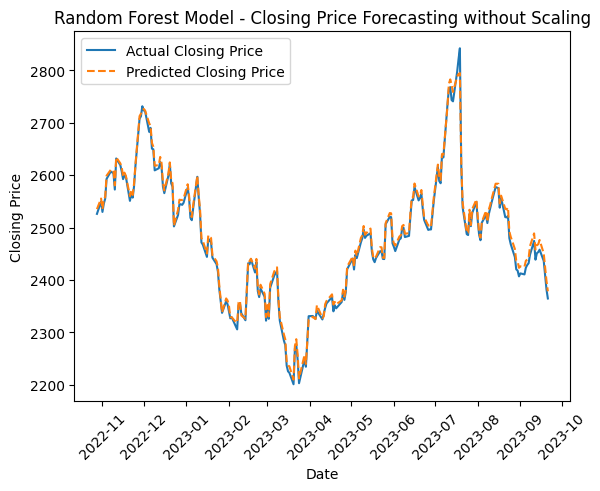

In [171]:
plt.plot(test.index, y_test, label='Actual Closing Price')
plt.plot(test.index, predictions, label='Predicted Closing Price', linestyle='dashed')
plt.title('Random Forest Model - Closing Price Forecasting without Scaling')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Random** **Forest**

In [172]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [173]:
predictions = rf_model.predict(X_test_scaled)


In [174]:
rmse = sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


In [175]:
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Root Mean Squared Error (RMSE): 8.937623147176222
Mean Absolute Error (MAE): 7.457364162142803
R-squared (R2): 0.9946979998969239


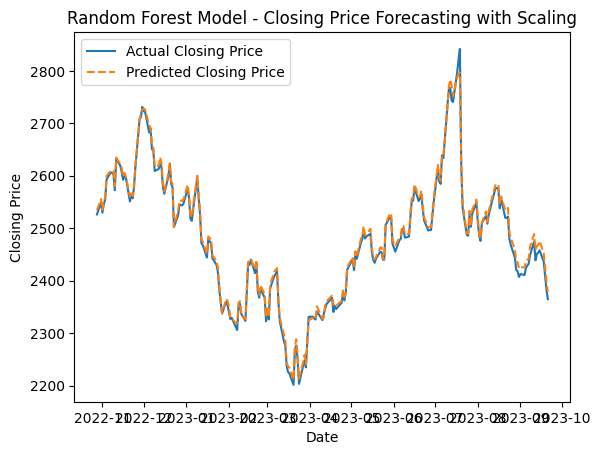

In [176]:
plt.plot(test.index, y_test, label='Actual Closing Price')
plt.plot(test.index, predictions, label='Predicted Closing Price', linestyle='dashed')
plt.title('Random Forest Model - Closing Price Forecasting with Scaling')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [178]:
# Create a pickle fine
import pickle
pickle_out = open("rf_model.pkl","wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()

In [180]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00


In [182]:
import streamlit as st


In [183]:
pickle_in = open("rf_model.pkl","rb")
rf =pickle.load(pickle_in)


In [184]:
rf

RandomForestRegressor(random_state=42)

In [186]:
X_train

,Open,High,Low,Adj Close,Volume,Open_lag_1,High_lag_1,Low_lag_1,Close_lag_1,Adj Close_lag_1,...,Low_lag_9,Close_lag_9,Adj Close_lag_9,Volume_lag_9,Open_lag_10,High_lag_10,Low_lag_10,Close_lag_10,Adj Close_lag_10,Volume_lag_10
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-15,1094.624023,1121.370483,1094.624023,1097.965454,10158260,1084.718018,1090.166260,1076.198730,1086.501099,1066.036987,...,1090.661621,1096.010864,1075.367554,7212697.0,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087.0
2019-01-16,1124.342407,1134.248413,1119.735962,1104.040405,6443279,1094.624023,1121.370483,1094.624023,1119.042603,1097.965454,...,1079.864014,1082.489136,1062.100586,7517041.0,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697.0
2019-01-17,1133.703613,1137.121216,1119.389282,1102.630859,7558941,1124.342407,1134.248413,1119.735962,1125.233887,1104.040405,...,1070.948486,1088.333740,1067.835083,8545382.0,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041.0
2019-01-18,1138.012817,1178.726807,1124.589966,1151.131470,25927601,1133.703613,1137.121216,1119.389282,1123.797485,1102.630859,...,1090.661621,1094.376465,1073.764038,5565822.0,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382.0
2019-01-21,1182.788330,1228.306885,1177.488525,1202.984985,22247437,1138.012817,1178.726807,1124.589966,1173.229004,1151.131470,...,1085.708618,1094.277344,1073.666748,5678473.0,1096.605225,1107.947754,1090.661621,1094.376465,1073.764038,5565822.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-06,2429.000000,2450.000000,2418.149902,2413.574219,6162021,2397.800049,2418.000000,2390.149902,2413.199951,2404.705566,...,2472.100098,2486.100098,2477.348877,4757219.0,2496.750000,2533.000000,2495.000000,2509.750000,2500.915771,4249172.0
2022-10-07,2414.649902,2443.899902,2414.649902,2423.788086,3560167,2429.000000,2450.000000,2418.149902,2422.100098,2413.574219,...,2436.100098,2439.500000,2430.912842,4397194.0,2486.000000,2503.000000,2472.100098,2486.100098,2477.348877,4757219.0
2022-10-10,2405.000000,2417.600098,2388.000000,2397.331543,2921076,2414.649902,2443.899902,2414.649902,2432.350098,2423.788086,...,2375.149902,2377.350098,2368.981689,5759298.0,2485.000000,2495.949951,2436.100098,2439.500000,2430.912842,4397194.0


In [191]:
def predict_note_authentication(Open,High,Low,Close):
      prediction=rf.predict([[Open,High,Low,Close]])
      print(prediction)
      return prediction



In [192]:
def main():
    st.title("Stock Market Price")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Bank Authenticator ML App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    variance = st.text_input("Open","Type Here")
    skewness = st.text_input("High","Type Here")
    curtosis = st.text_input("Low","Type Here")
    entropy = st.text_input("Close","Type Here")
    result=""
    if st.button("Predict"):
        result=predict_note_authentication(Open,High,Low,Close)
    st.success('The output is {}'.format(result))
    if st.button("About"):
        st.text("Lets LEarn")
        st.text("Built with Streamlit")
